# Electrostatic modes in a magnetized plasma
Effects due to different electron and ion pressure combinations are demonstrated.

In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt

sys.path.append('../../')
import xenon

In [58]:
def test(pe, pi, ax0, wrmax=None, make_legend=False):
    # parameters
    Bz = 4
    mi = 6
    gamma = 1

    species = np.array([
        # # q, m, n0, v0x, v0z, p0perp, p0para, gamma_perp, gamma_para
        [-1, 1, 1, 0, 0, pe, pe, gamma, gamma],
        [+1, mi, 1, 0, 0, pi, pi, gamma, gamma],
    ])
    params = dict(
        Bz=Bz,
        c=1.,
        epsilon0=1.,
    )

    dr_params = xenon.common.fluid_params(species=species, params=params)
  
    # compute input wavenumbers
    ks = np.linspace(0.1, 40, 50)
    # theta is angle between k and B0, i.e., z axis
    theta = np.deg2rad(90)

    kxs = ks * np.sin(theta)
    kzs = ks * np.cos(theta)

    # compute output real frequency and growth rates
    ws = xenon.fluid.k2w_es3d(kxs, kzs, species=species, params=params)

    # draw the dr
    xenon.common.plot_dr(ks, ws, ax0=ax0)
    
    ax0.set_ylim(-0.25, wrmax)
    ax0.set_xlabel(r'$kc/\omega_{pe}$')
    ax0.set_ylabel(r'$\omega_R/\omega_{pe}$')
    ax0.set_title(r'$p_e={:g},\ p_i={:g}$'.format(pe, pi))

    # draw extras lines to demonstrate the physics
    xenon.common.draw_extra_fluid(
        dr_params, ax0, ks,
        ['wUH', 'wLH'],
        np.cos(theta))
    if make_legend:
        print(f'wLH {dr_params.wLH}, wUH {dr_params.wUH}')
        # make legend for the characteristic curves
        handles, labels = ax0.get_legend_handles_labels()
        if len(handles) > 0:
            fig.legend(handles,
                       labels,
                       loc='upper center',
                       bbox_to_anchor=(0.5, 0),
                       bbox_transform=fig.transFigure,
                       ncol=len(handles),
                       fontsize='xx-large')

wLH 0.775208308812216, wUH 4.124337909175194


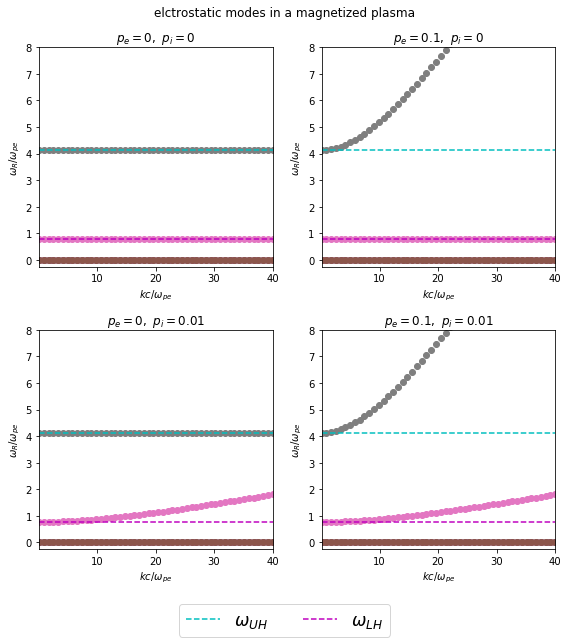

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()

wrmax = 8
test(0, 0, axs[0], wrmax)
test(0.1, 0, axs[1], wrmax)
test(0, 0.01, axs[2], wrmax)
test(0.1, 0.01, axs[3], wrmax, True)

fig.suptitle('elctrostatic modes in a magnetized plasma', va='bottom', y=1)
fig.tight_layout()